In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/hotel_bookings.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, classification_report 

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

In [ ]:
#LabelEncoder for transforming the categorical data.
from sklearn.preprocessing import LabelEncoder

#Train test split
from sklearn.model_selection import train_test_split
#Confusion matrix and ROC/AUC for comparing the models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Preprocessing

In [ ]:
#Checking whats the shape of the data
data.shape

(119390, 32)

In [ ]:
#verifying dataset disposal by last five records
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#verifying columns, null values, variable types... 
#Checking the general info of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
is_can = len(data[data['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(data))
data['reservation_status'].value_counts(normalize=True)*100

Percentage cancelation=  0.37041628277075134


Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


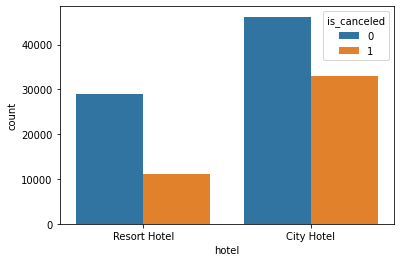

In [ ]:
sns.countplot(data=data, x='hotel', hue='is_canceled')
resort_canceled = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==1)]
city_canceled = data[(data['hotel']=='City Hotel') & (data['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(data[data['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(data[data['hotel']=='City Hotel'])))

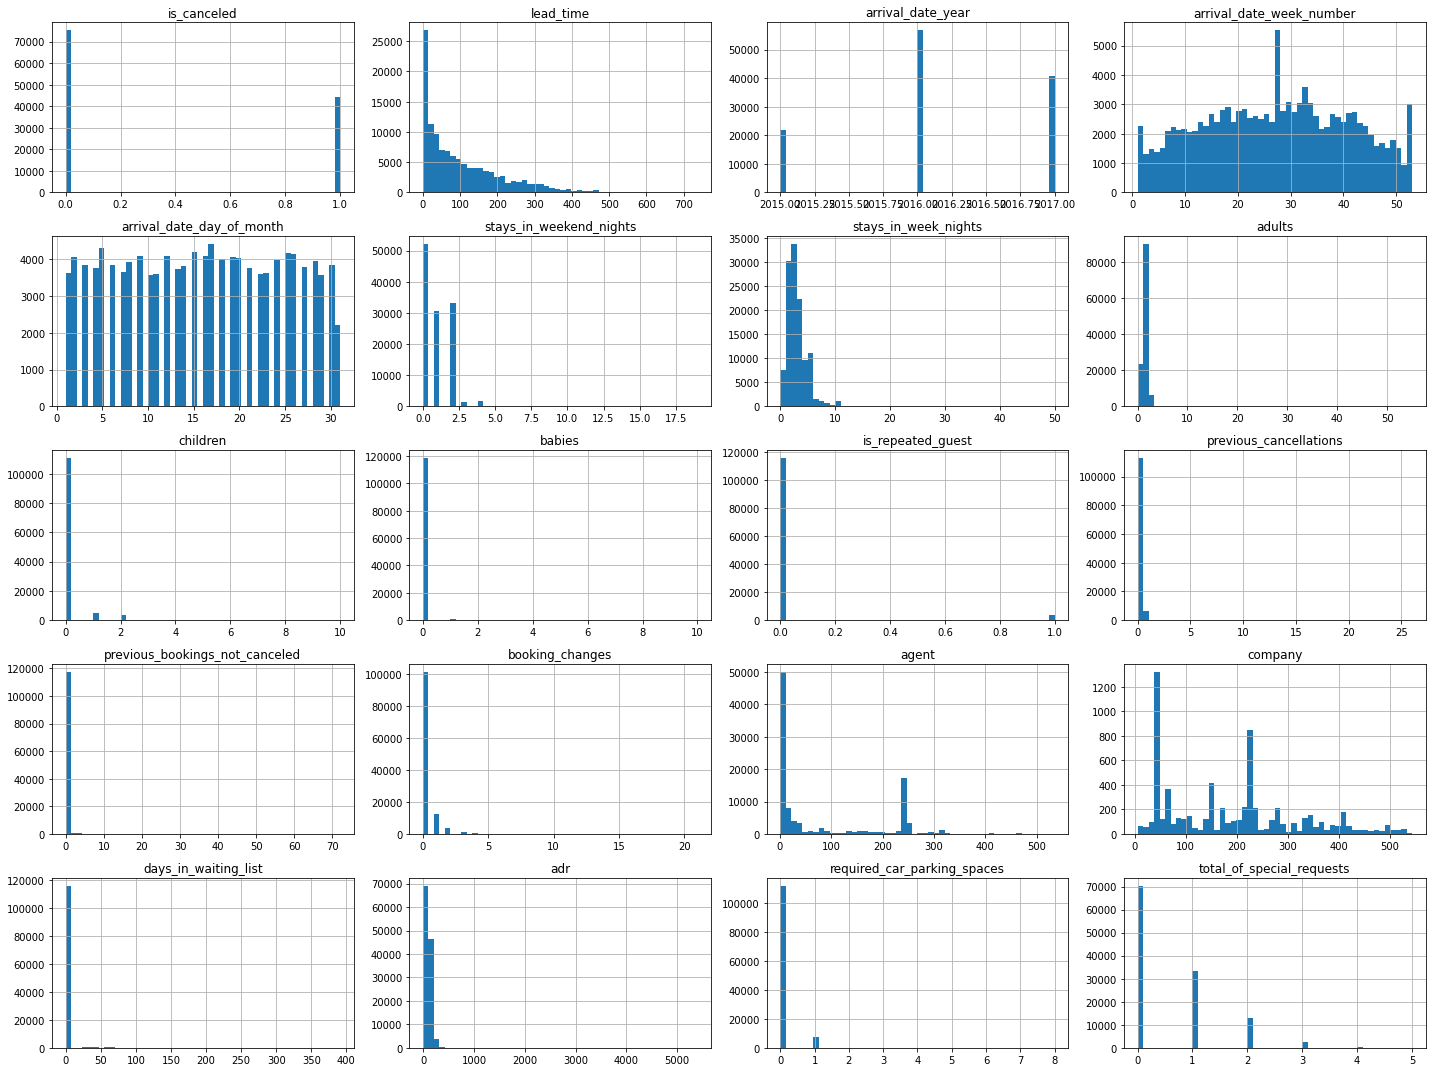

In [ ]:
# a histogram plot for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# Checking if we have missing data in the dataframe
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Dropping agent and company columns and filling missing data for children and country with the mode and mean of those columns
data=data.drop(['agent','company'],axis=1)
data.country=data.country.fillna(data.country.mode()[0])
data.children=data.children.fillna(data.children.mean())

In [ ]:
#Checking if we have more missing data:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#Getting a grasp of what the data contains and start planning what questions we want to answer in our exploratory data analysis
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Finding out the unique values for the categorical variable in the dataset:
print('Unique values for hotel:\n', data.hotel.unique())
print('Unique values for arrival_date_month:\n', data.arrival_date_month.unique())
print('Unique values for customer_type:\n', data.customer_type.unique())
print('Unique values for reservation_status:\n', data.reservation_status.unique())
print('Unique values for deposit_type:\n',data.deposit_type.unique())
print('Unique values for reserved_room_type :\n',data.reserved_room_type .unique())
print('Unique values for assigned_room_type :\n',data.assigned_room_type .unique())
print('Unique values for distribution_channel :\n',data.distribution_channel .unique())
print('Unique values for market_segment :\n',data.market_segment.unique())
print('Unique values for meal :\n',data.meal.unique())
print('Unique values for country :\n',data.country.unique())

Unique values for hotel:
 ['Resort Hotel' 'City Hotel']
Unique values for arrival_date_month:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique values for customer_type:
 ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values for reservation_status:
 ['Check-Out' 'Canceled' 'No-Show']
Unique values for deposit_type:
 ['No Deposit' 'Refundable' 'Non Refund']
Unique values for reserved_room_type :
 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values for assigned_room_type :
 ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values for distribution_channel :
 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values for market_segment :
 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values for meal :
 ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values for country :
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU

In [ ]:
# check the frequency percentage of countries
data['country'].value_counts(normalize=True)*100

PRT    41.107295
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
         ...    
DJI     0.000838
BWA     0.000838
HND     0.000838
VGB     0.000838
NAM     0.000838
Name: country, Length: 177, dtype: float64

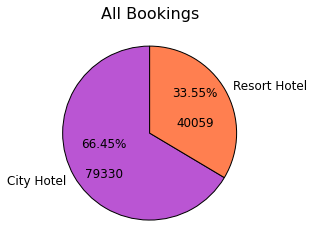

In [ ]:
# sum all values of a list and return the percentage and sum
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n\n{:d}".format(pct, absolute) 

plt.subplots(figsize=(4,4))

labels = data['hotel'].value_counts().index.tolist()
sizes = data['hotel'].value_counts().tolist()

plt.pie(sizes, labels=labels, colors=['MediumOrchid', 'Coral'], autopct = lambda pct: func(pct, sizes), startangle=90, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, textprops={'fontsize': 12})
plt.title("All Bookings", fontsize=16)
plt.show()

In [ ]:
# Transforming arrival date month names to numbers 1-12 for easier use and visualisation

data.arrival_date_month=data.arrival_date_month.map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

# transforming resort hotel and city hotel to 0 and 1 for easier use

data.hotel=data.hotel.map({'Resort Hotel':0 ,'City Hotel':1})

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


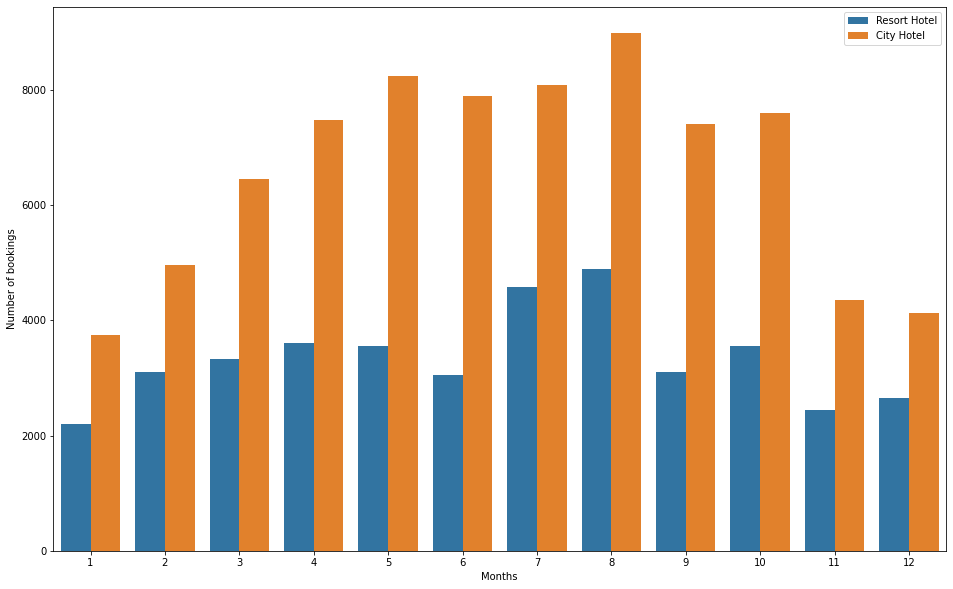

In [ ]:
# 1. Whats the most popular month for bookings for both resort hotel and and city hotel
plt.figure(figsize=(16,10))
legend_data={'Resort Hotel':0 ,'City Hotel':1}
ax=sns.countplot(x='arrival_date_month',data=data,hue='hotel')
ax.set(xlabel='Months',ylabel='Number of bookings')
ax.legend(legend_data)
plt.show()

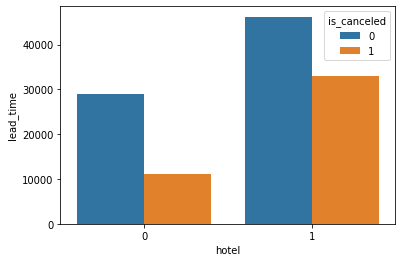

In [ ]:
#How does cancellation looks like for both hotels considering lead time.

ax=sns.barplot(x='hotel',y='lead_time',hue='is_canceled', data=data.groupby(["hotel","is_canceled"]).lead_time.count().reset_index())
#ax.legend(legend_data)
plt.show()

In [ ]:
data.groupby(["is_canceled"]).mean().reset_index()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0.615012,79.984687,2016.147514,6.526355,27.080143,15.839529,0.928971,2.464053,1.829737,0.102347,0.010377,0.043344,0.015792,0.202977,0.293364,1.589868,99.987693,0.0993,0.714060
1,1,0.748508,144.848815,2016.171920,6.596893,27.309696,15.728066,0.925267,2.561912,1.901728,0.106513,0.003821,0.012482,0.208348,0.025122,0.098340,3.564083,104.964333,0.0000,0.328826


In [ ]:
#Are there any major differences in lead time for both hotels.

data[['hotel','lead_time']].groupby(["hotel"]).mean().reset_index()

,hotel,lead_time
0,0,92.675686
1,1,109.735724


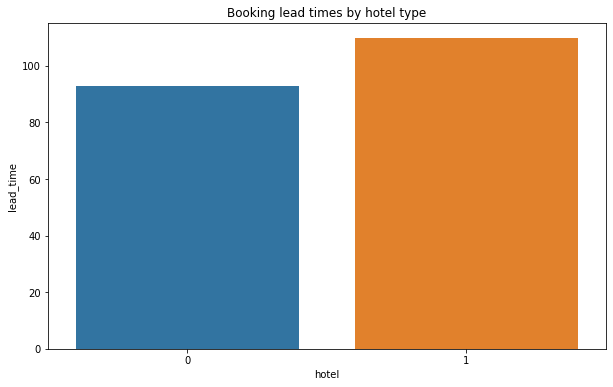

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='hotel',y='lead_time', data=data[['hotel','lead_time']].groupby(["hotel"]).mean().reset_index())
#ax.legend(legend_data)
plt.title('Booking lead times by hotel type')
plt.show()

Pivoting the data in order to try and spot some trends in lead time over the years.

In [ ]:
#Whats the Lead time behaviour across different months
data_line_plot=data[['arrival_date_year','arrival_date_month','lead_time']].groupby(['arrival_date_year',"arrival_date_month"]).mean().reset_index()
data_line_plot

,arrival_date_year,arrival_date_month,lead_time
0,2015,7,125.967939
1,2015,8,99.392389
2,2015,9,123.138248
3,2015,10,102.393988
4,2015,11,48.091880
5,2015,12,52.386301
6,2016,1,32.523132
7,2016,2,38.841172
8,2016,3,57.326078
9,2016,4,85.847273


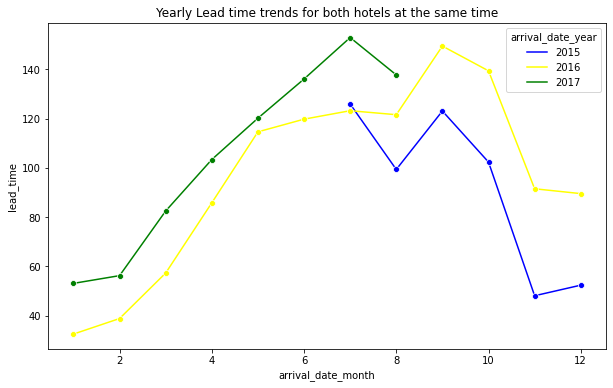

In [ ]:
#plotting a graph with lead time per year for all the data.
plt.figure(figsize=(10,6))
plt.title('Yearly Lead time trends for both hotels at the same time')
sns.lineplot(x='arrival_date_month',y='lead_time',data=data_line_plot,hue='arrival_date_year',marker='o',palette=['blue','yellow','green'])
plt.show()

In [ ]:
#Whats the proportion between booked and cancelled(what's the cancellation rate for both hotels)
lineplot2=data[['is_canceled','hotel','lead_time']].groupby(['is_canceled','hotel']).count().reset_index()
lineplot2

,is_canceled,hotel,lead_time
0,0,0,28938
1,0,1,46228
2,1,0,11122
3,1,1,33102


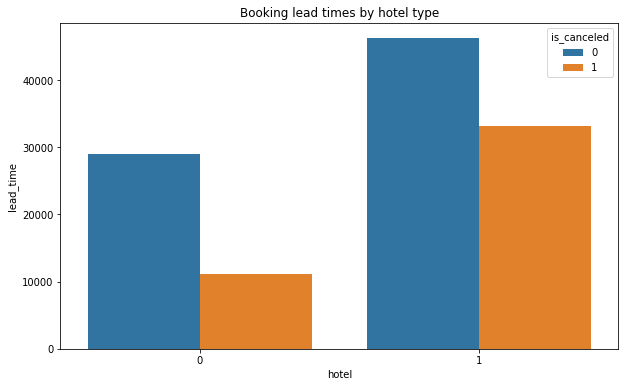

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='hotel',y='lead_time', data=lineplot2,hue='is_canceled')
#ax.legend(['Resort hotel is 0','City hotel is 1'])
plt.title('Booking lead times by hotel type')
plt.show()

In [ ]:
# Calculating the cancelation rate for both hotels:
print('Calcelation rate for resort hotel:',round(lineplot2['lead_time'][2]/(lineplot2['lead_time'][0]+lineplot2['lead_time'][2]),2))
print('Calcelation rate for city hotel:',round(lineplot2['lead_time'][3]/(lineplot2['lead_time'][1]+lineplot2['lead_time'][3]),2))

Calcelation rate for resort hotel: 0.28
Calcelation rate for city hotel: 0.42


Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


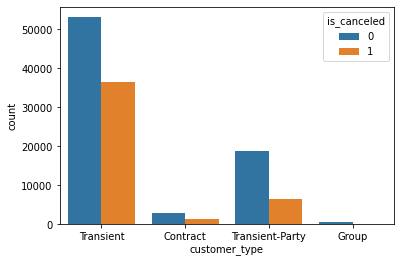

In [ ]:
# Calculating cancellation rate by customer type
print(data['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=data, x='customer_type', hue='is_canceled')

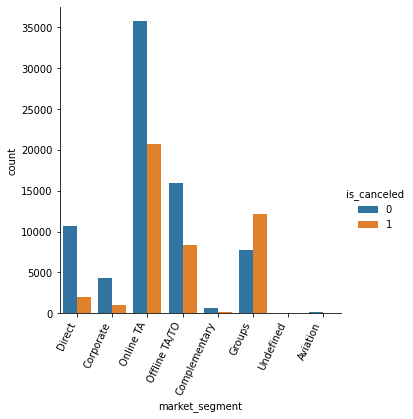

In [ ]:
# Calculating cancellation rate by market segment
chart = sns.catplot(data=data, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

In [ ]:
#Are cancellation spiking in a particular month or year
data_line_plot=data[['arrival_date_year','arrival_date_month','is_canceled','hotel']].groupby(['arrival_date_year',"arrival_date_month",'hotel']).mean().reset_index()
data_line_plot

,arrival_date_year,arrival_date_month,hotel,is_canceled
0,2015,7,0,0.232221
1,2015,7,1,0.671674
2,2015,8,0,0.259759
3,2015,8,1,0.496774
4,2015,9,0,0.347634
5,2015,9,1,0.437234
6,2015,10,0,0.261617
7,2015,10,1,0.390136
8,2015,11,0,0.167421
9,2015,11,1,0.243725


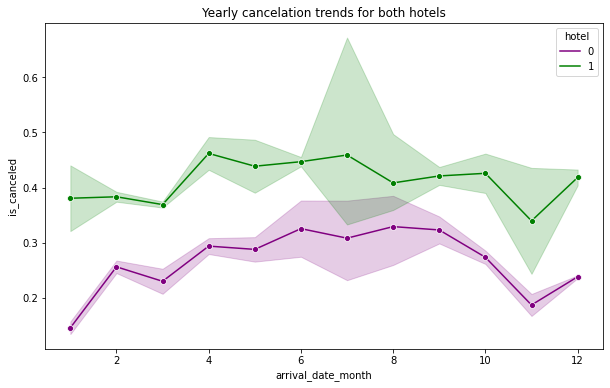

In [ ]:
#plotting a graph with lead time per year for all the data.
plt.figure(figsize=(10,6))
plt.title('Yearly cancelation trends for both hotels')
sns.lineplot(x='arrival_date_month',y='is_canceled',data=data_line_plot,hue='hotel',marker='o',palette=['purple','green'])
plt.show()

Label encoding the categorical columns

In this section I am transforming the categorical data into numerical 
in order to run a correlation analysis and find which features are relevant for our machine learning model.

In [ ]:
# Calling the LabelEncoder. Also I am duplicating data into data1 where I will encode all the categorical values.
# After that I will see the correlations of all the variables and particularly the correllation with is_cancelled.
# That way if some of the variables have very low correlation I can safely drop from the models.
le = LabelEncoder()
data1=data
data1.customer_type=le.fit_transform(data1.customer_type)

# changing the country strings to numerical data
data1.country=le.fit_transform(data1.country)

#Transforming all the data to numerical values so that we can use those variables for correlation analysis and the model building
data1.deposit_type=le.fit_transform(data1.deposit_type)
data1.reserved_room_type=le.fit_transform(data1.reserved_room_type)
data1.assigned_room_type=le.fit_transform(data1.assigned_room_type)
data1.distribution_channel=le.fit_transform(data1.distribution_channel)
data1.market_segment=le.fit_transform(data1.market_segment)
data1.meal=le.fit_transform(data1.meal)

#I will need to exclude reservation_status as it contains data which is relating to whether a reservation is cancelled or not, hence, we cannot use that as a X variable.

In [ ]:
data1.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,-0.013183,-0.044204,-0.043434,0.008018,-0.046073,0.083795,0.174419,-0.050421,-0.012292,-0.004441,-0.249677,-0.307834,-0.072820,0.159021,0.072432,0.047531,0.096719,-0.218873,-0.043390
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.017678,0.267502,0.059338,0.167600,-0.084793,0.110133,-0.057358,-0.061282,-0.176028,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037621,-0.020915,0.000349,0.051507,0.013797,0.220414,-0.124410,0.086042,-0.073548,-0.106089,-0.172219,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054622,-0.013192,0.065840,-0.154128,0.107697,0.022644,0.010341,-0.119822,0.029218,0.092809,0.036141,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,0.028534,0.005441,0.010172,-0.015205,0.025010,0.001293,0.007381,-0.030729,0.037479,-0.021640,-0.007923,-0.006378,0.004809,0.004048,0.019045,-0.029753,0.079315,0.000257,0.028026
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.017381,0.025759,-0.000510,0.005699,-0.030131,0.035501,-0.020904,-0.007997,-0.005684,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.007086,-0.000892,-0.004088,0.001578,-0.006145,-0.027011,-0.000300,0.016929,0.011646,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045792,0.018483,0.045744,-0.128470,0.115350,0.093097,-0.087239,-0.012775,-0.042715,0.142083,0.086643,0.063281,-0.111435,-0.054151,-0.109220,0.049342,-0.018554,0.072671
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044202,0.020191,0.036742,-0.121158,0.108569,0.087185,-0.097245,-0.013992,-0.048743,0.168616,0.100795,0.096209,-0.076788,-0.002020,-0.127223,0.065237,-0.024859,0.068192
adults,-0.013183,0.060017,0.119519,0.029635,0.028534,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030446,0.018146,0.026327,-0.110975,0.208409,0.178978,-0.146426,-0.006738,-0.107983,0.211434,0.144779,-0.051673,-0.027644,-0.008283,-0.101756,0.230641,0.014785,0.122884


In [ ]:
#Determining how how are all x values correlated to is_canceled
data1.corr()['is_canceled']

hotel                             0.136531
is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
meal                             -0.017678
country                           0.267502
market_segment                    0.059338
distribution_channel              0.167600
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
assigned_room_type               -0.176028
booking_changes                  -0.144381
deposit_type                      0.468634
days_in_wai

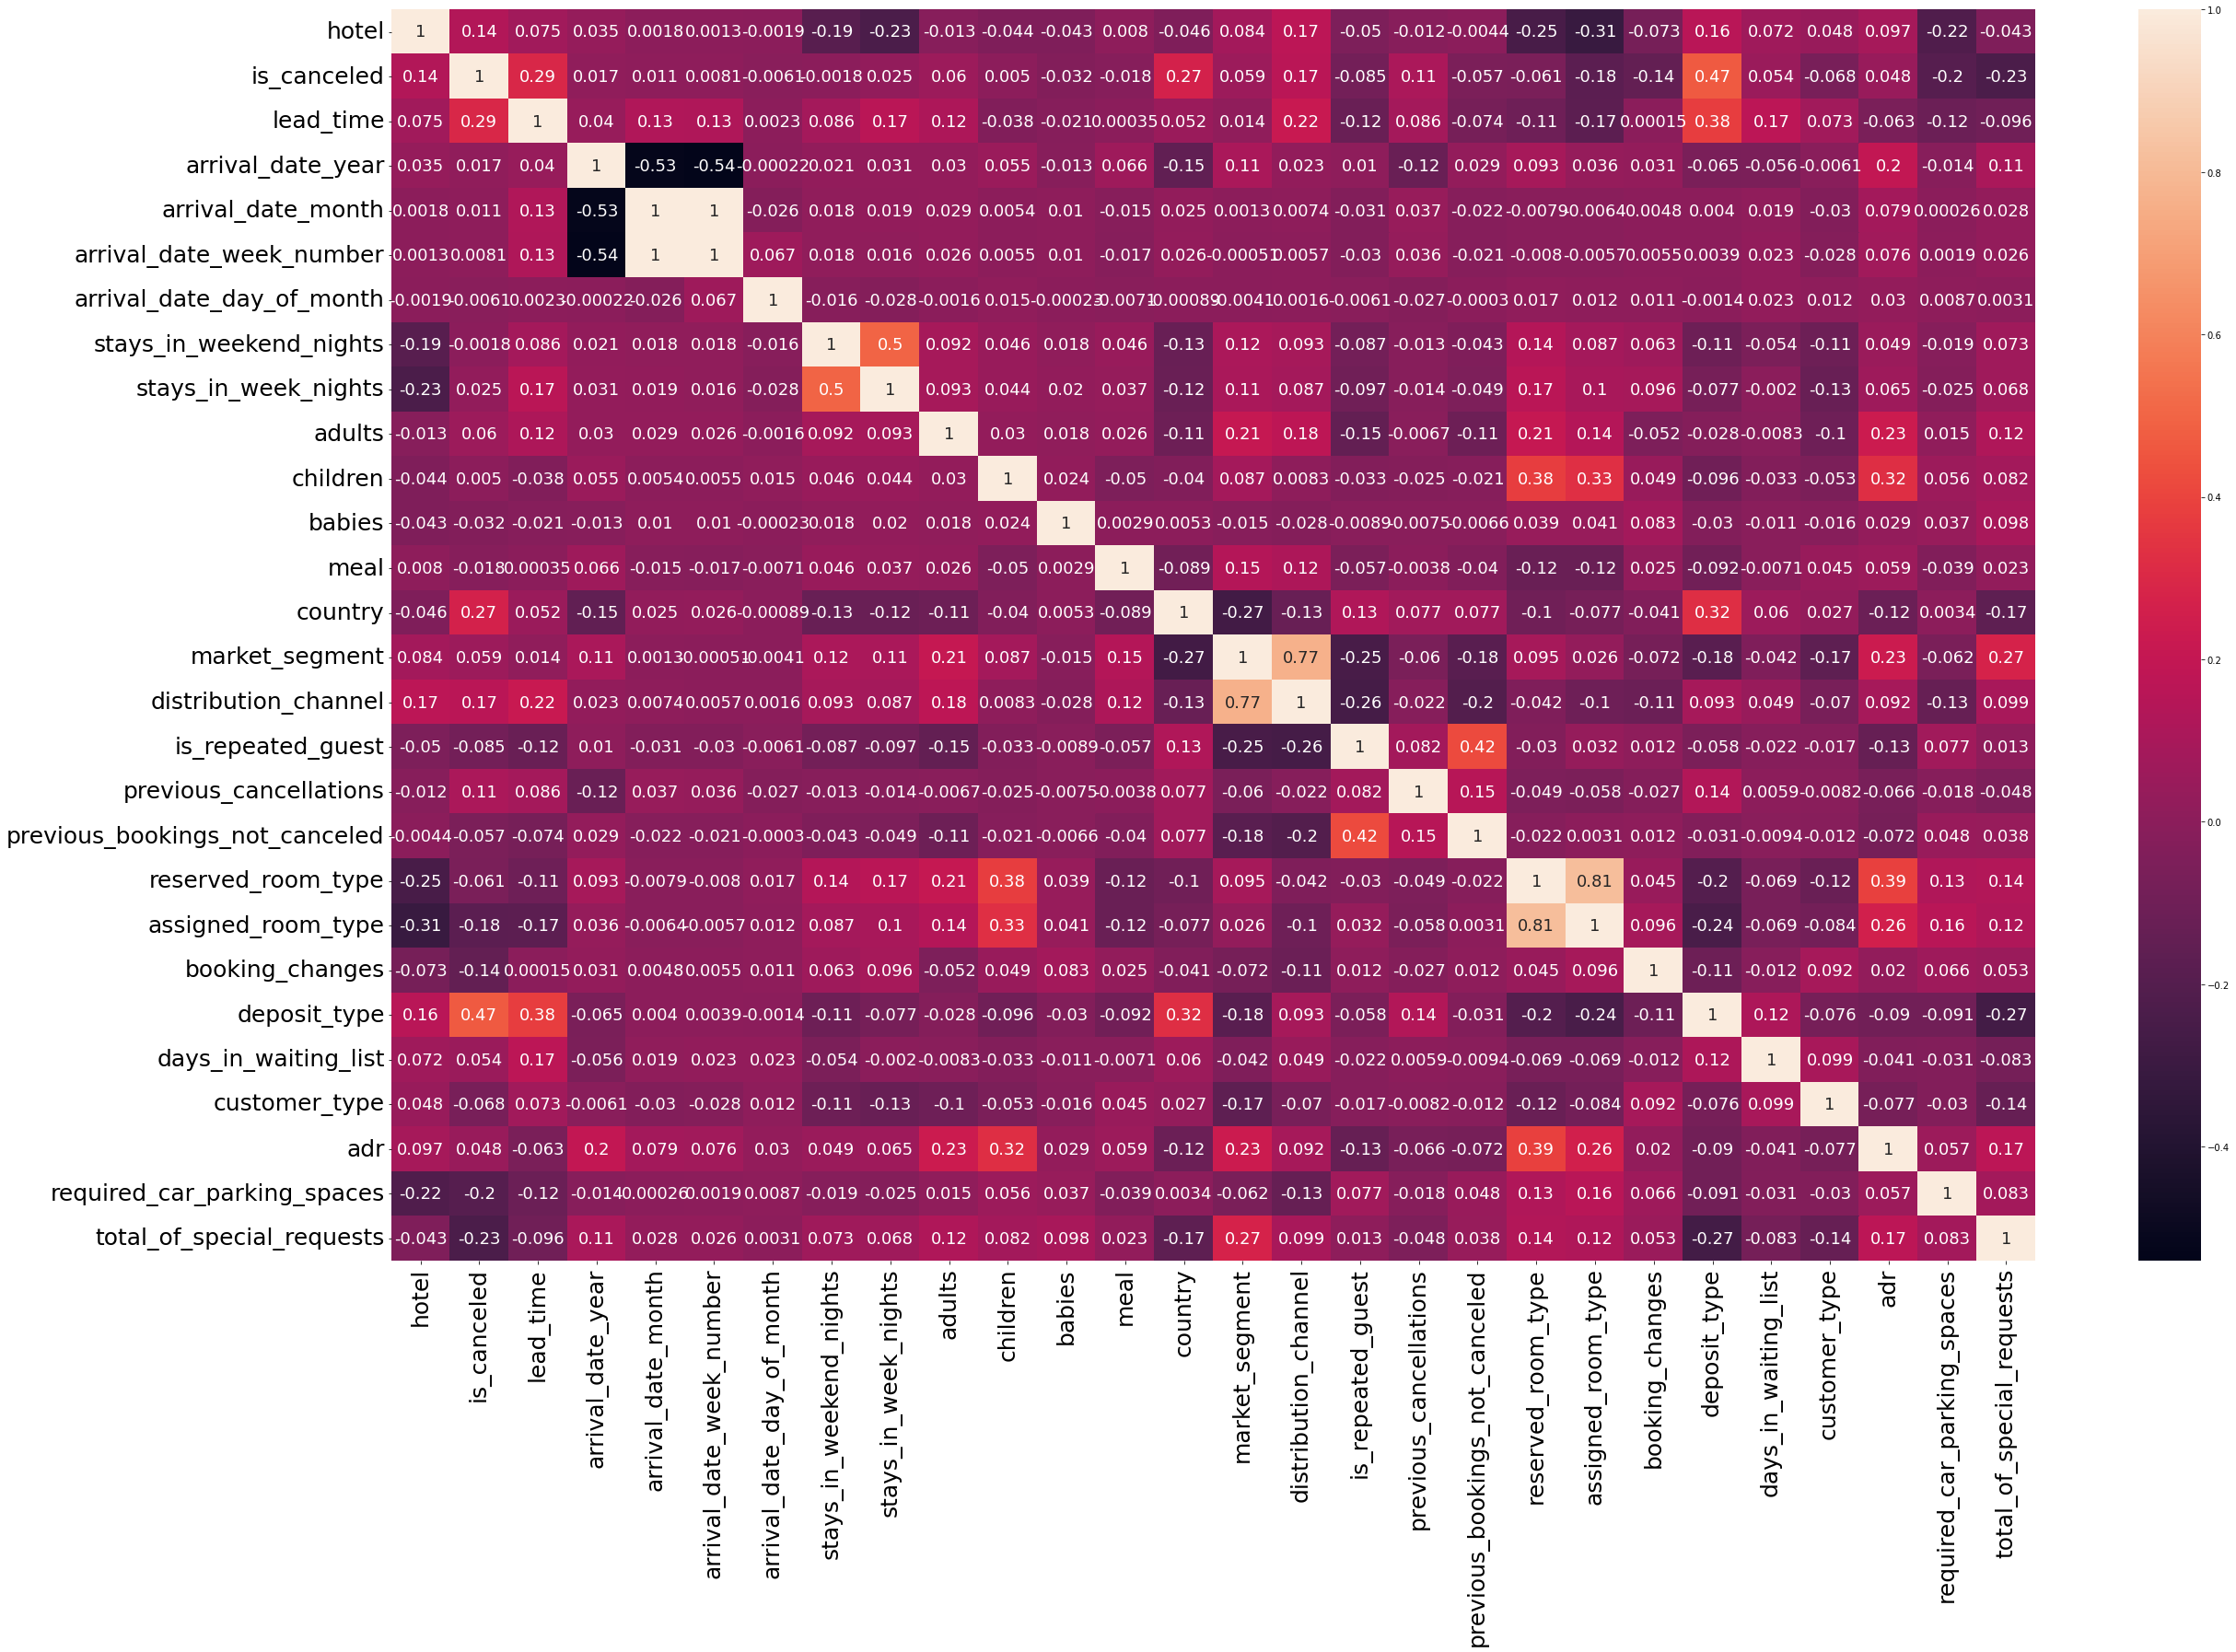

In [ ]:
#Correlation heatmap
plt.figure(figsize=(40,25))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':18})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

Data Engineering

In [ ]:
# Creating "arrival_date" using year, month and day column
data1['arrival_date'] = data1['arrival_date_year'].astype(str)+'-'+data1['arrival_date_month'].astype(str)+'-'+data1['arrival_date_day_of_month'].astype(str)

In [ ]:
data1['reservation_status_date'] = pd.to_datetime(data1['reservation_status_date'])
data1['arrival_date'] = pd.to_datetime(data1['arrival_date'])

In [ ]:
# Creating a column to determine if the assigned room is different from the reserved room
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

data1['change_in_room'] = data1.apply(roomChange, axis=1)

In [ ]:
# Creating a column that combines children and babies as "offspring"
data1['offspring'] = (data1['children'] + data1['babies']).astype(int)

In [ ]:
data1['stay_duration'] = data1['reservation_status_date'] - data1['arrival_date']
data1['stay_duration'] = data1['stay_duration'] / np.timedelta64(1, 'D')
data1['stay_duration'] = data1['stay_duration'].astype(int)

In [ ]:
for i in range(len(data1)):
    if data1.loc[i, 'stay_duration']<0:
        data1.at[i, 'stay_duration'] = -1

In [ ]:
for i in range(len(data1)):
    if data1.loc[i, 'country'] == 'PRT':
        data1.at[i, 'country'] = 1
    elif data1.loc[i, 'country'] == 'GBR':
        data1.at[i, 'country'] = 2
    elif data1.loc[i, 'country'] == 'FRA':
        data1.at[i, 'country'] = 3
    elif data1.loc[i, 'country'] == 'ESP':
        data1.at[i, 'country'] = 4
    elif data1.loc[i, 'country'] == 'DEU':
        data1.at[i, 'country'] = 5
    else:
        data1.at[i, 'country'] = 0

In [ ]:
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,change_in_room,offspring,stay_duration
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,0,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,Check-Out,2015-07-01,2015-07-01,False,0,0
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,0,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,Check-Out,2015-07-01,2015-07-01,False,0,0
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,Check-Out,2015-07-02,2015-07-01,True,0,1
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,Check-Out,2015-07-02,2015-07-01,False,0,1
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.0,0,1,Check-Out,2015-07-03,2015-07-01,False,0,2


In [ ]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data1[item] = lb.fit_transform(data1[item])
data1 = pd.get_dummies(data1, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [ ]:
data1.drop(['assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1, inplace=True)

In [ ]:
train_var = data1.drop(['is_canceled'], axis=1)
test_var = data1['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 46), (95512,), (23878, 46), (23878,))

In [ ]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [ ]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Average cross validation score: 0.990
Test accuracy: 0.991
F1 score: 0.988
[[14921    11]
 [  195  8751]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14932
           1       1.00      0.98      0.99      8946

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



In [ ]:
#Linear SVC
svc = LinearSVC().fit(X_train_mm, y_train)
scores = cross_val_score(svc, X_train_mm, y_train, cv=5)
svc_pred = svc.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Average cross validation score: 0.994
Test accuracy: 0.995
F1 score: 0.994
[[14929     3]
 [  107  8839]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14932
           1       1.00      0.99      0.99      8946

    accuracy                           1.00     23878
   macro avg       1.00      0.99      1.00     23878
weighted avg       1.00      1.00      1.00     23878



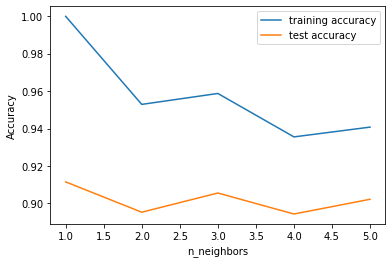

In [ ]:
#KNN
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

Average cross validation score: 0.899
Test accuracy: 0.906
F1 score: 0.869
[[14123   809]
 [ 1446  7500]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     14932
           1       0.90      0.84      0.87      8946

    accuracy                           0.91     23878
   macro avg       0.90      0.89      0.90     23878
weighted avg       0.91      0.91      0.90     23878



In [ ]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 0.992
[[14785   147]
 [    0  8946]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14932
           1       0.98      1.00      0.99      8946

    accuracy                           0.99     23878
   macro avg       0.99      1.00      0.99     23878
weighted avg       0.99      0.99      0.99     23878



In [ ]:
#Random Forest
forest = RandomForestClassifier(n_estimators=70 ,max_depth = 8)
forest.fit(X_train_mm,y_train)
scores = cross_val_score(forest, X_train_mm, y_train, cv=5)
forest_pred = forest.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, forest_pred)))
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

Average cross validation score: 0.999
Test accuracy: 0.995
F1 score: 0.999
[[14928     4]
 [   15  8931]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14932
           1       1.00      1.00      1.00      8946

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [ ]:
#Gradient Boosted Classifier
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_mm, y_train)
scores = cross_val_score(model_xgb, X_train_mm, y_train, cv=5)
model_xgb_pred = model_xgb.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, model_xgb_pred)))
print(confusion_matrix(y_test, model_xgb_pred))
print(classification_report(y_test, model_xgb_pred))

Average cross validation score: 0.999
Test accuracy: 0.995
F1 score: 0.999
[[14927     5]
 [    6  8940]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14932
           1       1.00      1.00      1.00      8946

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [ ]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=15, alpha=0.0001,
                     solver='sgd', verbose=10,tol=0.000000001)
mlp.fit(X_train_mm, y_train)
scores = cross_val_score(mlp, X_train_mm, y_train, cv=5)
mlp_pred = mlp.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

Iteration 1, loss = 0.60489425
Iteration 2, loss = 0.50757919
Iteration 3, loss = 0.46467115
Iteration 4, loss = 0.44140692
Iteration 5, loss = 0.42188884
Iteration 6, loss = 0.40159233
Iteration 7, loss = 0.37808864
Iteration 8, loss = 0.34743500
Iteration 9, loss = 0.30531424
Iteration 10, loss = 0.24995260
Iteration 11, loss = 0.18875010
Iteration 12, loss = 0.13730059
Iteration 13, loss = 0.10145518
Iteration 14, loss = 0.07839873
Iteration 15, loss = 0.06340519


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.63165073
Iteration 2, loss = 0.55611687
Iteration 3, loss = 0.49539843
Iteration 4, loss = 0.46722845
Iteration 5, loss = 0.44933094
Iteration 6, loss = 0.43354460
Iteration 7, loss = 0.41799555
Iteration 8, loss = 0.40122579
Iteration 9, loss = 0.38282524
Iteration 10, loss = 0.36090934
Iteration 11, loss = 0.33242784
Iteration 12, loss = 0.29495012
Iteration 13, loss = 0.24802235
Iteration 14, loss = 0.19722601
Iteration 15, loss = 0.15117513


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.61404249
Iteration 2, loss = 0.52878286
Iteration 3, loss = 0.48784692
Iteration 4, loss = 0.46778076
Iteration 5, loss = 0.45249062
Iteration 6, loss = 0.43763205
Iteration 7, loss = 0.42202921
Iteration 8, loss = 0.40560295
Iteration 9, loss = 0.38669386
Iteration 10, loss = 0.36510446
Iteration 11, loss = 0.33890066
Iteration 12, loss = 0.30505737
Iteration 13, loss = 0.26189223
Iteration 14, loss = 0.21205124
Iteration 15, loss = 0.16427880


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.64194536
Iteration 2, loss = 0.54202068
Iteration 3, loss = 0.48945082
Iteration 4, loss = 0.46574826
Iteration 5, loss = 0.44723144
Iteration 6, loss = 0.42979062
Iteration 7, loss = 0.41192541
Iteration 8, loss = 0.39261108
Iteration 9, loss = 0.36944744
Iteration 10, loss = 0.34002224
Iteration 11, loss = 0.30247474
Iteration 12, loss = 0.25563798
Iteration 13, loss = 0.20380159
Iteration 14, loss = 0.15670765
Iteration 15, loss = 0.11988348


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.61952550
Iteration 2, loss = 0.52732028
Iteration 3, loss = 0.47339494
Iteration 4, loss = 0.45007142
Iteration 5, loss = 0.43363289
Iteration 6, loss = 0.41829938
Iteration 7, loss = 0.40191332
Iteration 8, loss = 0.38338231
Iteration 9, loss = 0.36079389
Iteration 10, loss = 0.33165163
Iteration 11, loss = 0.29298592
Iteration 12, loss = 0.24547474
Iteration 13, loss = 0.19499115
Iteration 14, loss = 0.15016659
Iteration 15, loss = 0.11529891


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.62965670
Iteration 2, loss = 0.55692401
Iteration 3, loss = 0.49567027
Iteration 4, loss = 0.46741901
Iteration 5, loss = 0.44983992
Iteration 6, loss = 0.43486639
Iteration 7, loss = 0.42050627
Iteration 8, loss = 0.40517264
Iteration 9, loss = 0.38780747
Iteration 10, loss = 0.36707764
Iteration 11, loss = 0.33982445
Iteration 12, loss = 0.30335901
Iteration 13, loss = 0.25767974
Iteration 14, loss = 0.20626653
Iteration 15, loss = 0.15838234


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Average cross validation score: 0.977
Test accuracy: 0.992
F1 score: 0.989
[[14918    14]
 [  181  8765]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14932
           1       1.00      0.98      0.99      8946

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878

